# Sports Instrument Recognizer
The goal of this project is to classify 20 different types of sports equipment or instrument popular around the globe. The types are following: <br/>
1. Basket ball
2. Soccer ball
3. Goal keeping gloves
4. Rugby ball
5. Baseball bat
6. Tennis racket
7. Golf club
8. Cricket bat
9. Cricket ball
10. Cricket helmet
11. Hockey stick
12. Hockey helmet
13. Volleyball ball
14. Table tennis paddle
15. Badminton racket
16. Badminton cork
17. Squash racket
18. Lacrosse stick
19. Frisbee disc
20. Bowling ball
21. Pool cue

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse/Sports Instrument

/content/drive/My Drive/MasterCourse/Sports Instrument


# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [ ]:
doc(search_images_ddg)

In [ ]:
sport_instrument_labels = [
"Basket ball",
"Soccer ball",
"Goal keeping gloves",
"Rugby ball",
"Baseball bat",
"Tennis racket",
"Golf club",
"Cricket bat",
"Cricket ball",
"Cricket helmet",
"Hockey stick",
"Hockey helmet",
"Volleyball ball",
"Table tennis paddle",
"Badminton racket",
"Badminton cork",
"Squash racket",
"Lacrosse stick",
"Frisbee disc",
"Bowling ball",
"Pool cue"
]
len(sport_instrument_labels)

21

In [ ]:
images = search_images_ddg(sport_instrument_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://thumbs.dreamstime.com/b/basket-ball-3706897.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "basket ball.jpg"
download_url(images[0], dest, show_progress=False)

Path('basket ball.jpg')

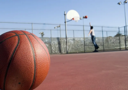

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for sport_instrument_type in sport_instrument_labels:

  dest = f"{data_path}/{sport_instrument_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(sport_instrument_type)
    download_images(dest, urls = cap_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3930) [Path('data/Basket ball/c72ae224-a1af-4b77-b760-971390fafd2c.jpg'),Path('data/Basket ball/c9f3534b-0383-4899-a08e-bc8b7acdbb55.jpg'),Path('data/Basket ball/287ee51f-1e00-4bd6-bc6e-8526023ed32e.jpg'),Path('data/Basket ball/3d281286-5e2e-4ed3-a34b-dce9b2c41548.jpg'),Path('data/Basket ball/af47ed38-144a-46e3-8265-7fafd4db2ca8.jpg'),Path('data/Basket ball/e14f2ae9-dbec-44ba-94b8-c4db226a68e3.jpg'),Path('data/Basket ball/44fba3c7-381d-4702-a562-f546130ead95.png'),Path('data/Basket ball/84eddc9a-8c6b-43ab-a8fd-008a218a9486.jpg'),Path('data/Basket ball/9df996c2-68f3-4584-88be-bc7cfa82664e.jpg'),Path('data/Basket ball/5fd9c8bc-08dc-419a-b6d0-0e7ee9a7f935.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#103) [Path('data/Basket ball/db6950a9-f71c-4949-acae-4934de5efaf8.jpg'),Path('data/Basket ball/bd055d35-8f63-4461-961c-9cb35eea8ae9.jpg'),Path('data/Basket ball/e5dcf74b-e8d8-44b7-b477-0e117550f223.png'),Path('data/Basket ball/68a42062-2eea-4f7f-8a24-97d15c757b23.jpg'),Path('data/Basket ball/694d1866-2192-47b8-adfb-edffc658a17f.jpg'),Path('data/Soccer ball/58ac0af4-0d7b-483c-95dd-5f058e3397e6.png'),Path('data/Soccer ball/fac2cf39-09eb-4b81-b79f-b28acb297fbd.jpg'),Path('data/Soccer ball/8894a5f3-5f1f-4f0c-b190-a58ee70c91d9.jpg'),Path('data/Rugby ball/78cce79d-3339-42bb-819a-b8fd79491112.jpg'),Path('data/Rugby ball/27017a0f-0f52-4772-ad2b-07e4bf3d3e2f.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#103) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3827) [Path('data/Basket ball/c72ae224-a1af-4b77-b760-971390fafd2c.jpg'),Path('data/Basket ball/c9f3534b-0383-4899-a08e-bc8b7acdbb55.jpg'),Path('data/Basket ball/287ee51f-1e00-4bd6-bc6e-8526023ed32e.jpg'),Path('data/Basket ball/3d281286-5e2e-4ed3-a34b-dce9b2c41548.jpg'),Path('data/Basket ball/af47ed38-144a-46e3-8265-7fafd4db2ca8.jpg'),Path('data/Basket ball/e14f2ae9-dbec-44ba-94b8-c4db226a68e3.jpg'),Path('data/Basket ball/44fba3c7-381d-4702-a562-f546130ead95.png'),Path('data/Basket ball/84eddc9a-8c6b-43ab-a8fd-008a218a9486.jpg'),Path('data/Basket ball/9df996c2-68f3-4584-88be-bc7cfa82664e.jpg'),Path('data/Basket ball/5fd9c8bc-08dc-419a-b6d0-0e7ee9a7f935.jpg')...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=13),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

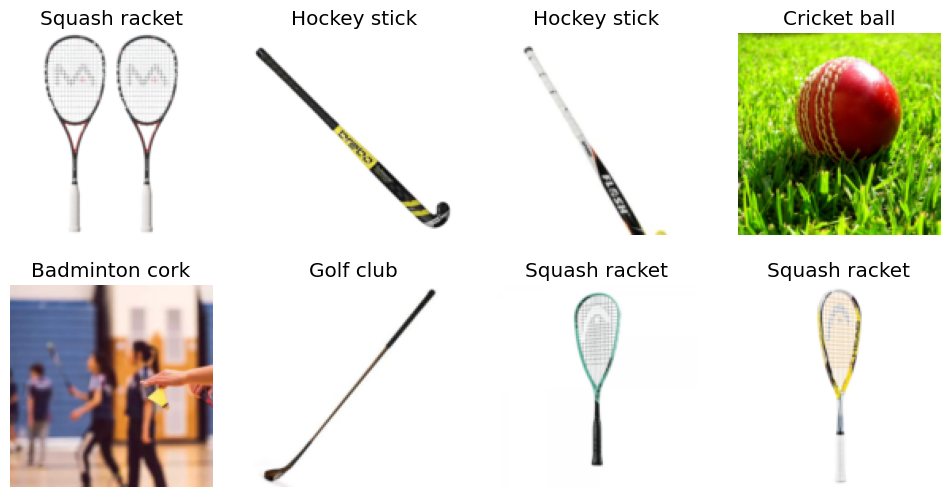

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

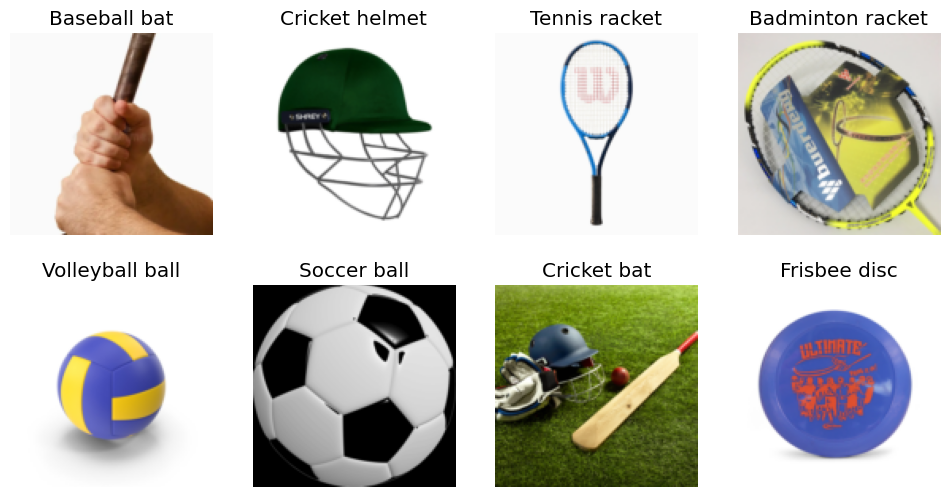

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

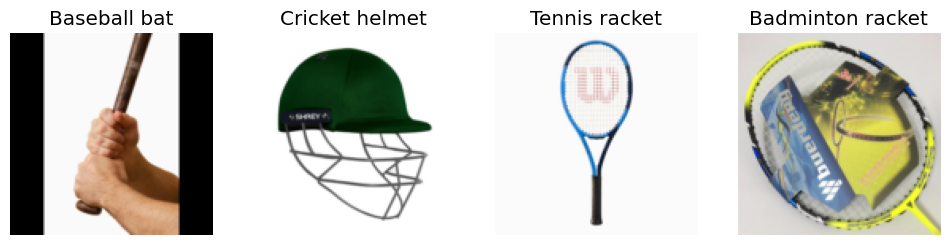

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
torch.save(dls, "dataloader_v0.pkl")